In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_df(csv_file):
    df = pd.read_csv(os.path.join(root_path, csv_file), delimiter="\t", skiprows=2)
    df.rename(columns=rename_columns, inplace=True)
    df.set_index("id", inplace=True)
    if "prp" in csv_file:
        df["status"] = np.where(df["status"]=='true', True, False)
    #TODO split id into domains
    return df

In [3]:
root_path = os.path.expanduser("~/Work/Data/app")
rename_columns = {"benchmarks/benchexe/tasks/": "id", "cputime (s)": "cputime", "walltime (s)": "walltime", "memory (MB)": "memory_mb",
                 "status.1": "status_s", "cputime (s).1": "cputime_s", "walltime (s).1": "walltime_s", "memory (MB).1": "memory_mb_s",
                  "policy_size.1": "policy_size_s",	"solve_time.1": "solve_time_s",	"translation_time.1": "translation_time_s"
                 }

lpg_container_1 = "results_local/benchmark-lpg-test.2024-03-26_09-27-26.results.lpg.BlocksWorld.csv"
lpg_container_2 = "results_local/benchmark-lpg-test.nocon.2024-03-26_09-49-23.results.lpg.BlocksWorld.csv"
lpg_no_container = "results_nocontainer/results.2024-03-25_17-02-07.table.csv"

df_1 = get_df(lpg_container_1)
df_2 = get_df(lpg_container_2)
df_3 = get_df(lpg_no_container)

In [4]:
df_1

,status,cputime,walltime,memory_mb,policy_size,solve_time,translation_time
id,,,,,,,
AIJ_BlocksWorld_LIN10-110_10.yml,True,0.792723,0.850720,260.554752,4,0.481538,0.211708
AIJ_BlocksWorld_LIN10-110_100.yml,True,330.355299,357.254320,292.179968,479,356.419090,0.230188
AIJ_BlocksWorld_LIN10-110_105.yml,True,351.491727,424.182112,289.423360,507,423.773749,0.252331
AIJ_BlocksWorld_LIN10-110_110.yml,True,372.427798,434.779827,288.460800,501,434.343139,0.266692
AIJ_BlocksWorld_LIN10-110_15.yml,True,11.515682,12.309185,272.752640,11,11.813163,0.299211
AIJ_BlocksWorld_LIN10-110_20.yml,True,20.250714,20.966883,283.381760,36,20.294321,0.397683
AIJ_BlocksWorld_LIN10-110_25.yml,True,22.253878,22.672950,273.408000,72,22.254085,0.233223
AIJ_BlocksWorld_LIN10-110_30.yml,True,57.508777,96.867848,284.241920,66,95.182402,0.267167
AIJ_BlocksWorld_LIN10-110_35.yml,True,56.152379,58.018509,284.930048,99,56.491272,0.342529


## Merge the data

In [5]:
df = df_1.merge(df_2, how="inner", right_index = True, left_index = True, suffixes=('_1', '_2'))
df["time_diff"] = df["cputime_1"] - df["cputime_2"]
# df["time_diff_s"] = df["cputime_s_1"] - df["cputime_s_2"]
df

,status_1,cputime_1,walltime_1,memory_mb_1,policy_size_1,solve_time_1,translation_time_1,status_2,cputime_2,walltime_2,memory_mb_2,policy_size_2,solve_time_2,translation_time_2,time_diff
id,,,,,,,,,,,,,,,
AIJ_BlocksWorld_LIN10-110_10.yml,True,0.792723,0.850720,260.554752,4,0.481538,0.211708,True,0.544657,0.547384,260.734976,4,0.273303,0.169746,0.248066
AIJ_BlocksWorld_LIN10-110_100.yml,True,330.355299,357.254320,292.179968,479,356.419090,0.230188,True,314.060980,334.755152,297.119744,479,333.288194,0.182227,16.294319
AIJ_BlocksWorld_LIN10-110_105.yml,True,351.491727,424.182112,289.423360,507,423.773749,0.252331,True,341.961885,364.296558,294.264832,507,363.986851,0.186079,9.529842
AIJ_BlocksWorld_LIN10-110_110.yml,True,372.427798,434.779827,288.460800,501,434.343139,0.266692,True,356.520302,381.583922,296.321024,501,381.275613,0.175267,15.907496
AIJ_BlocksWorld_LIN10-110_15.yml,True,11.515682,12.309185,272.752640,11,11.813163,0.299211,True,11.176094,11.200118,274.927616,11,10.834328,0.227652,0.339588
AIJ_BlocksWorld_LIN10-110_20.yml,True,20.250714,20.966883,283.381760,36,20.294321,0.397683,True,19.568090,19.725439,287.277056,36,19.397897,0.192596,0.682624
AIJ_BlocksWorld_LIN10-110_25.yml,True,22.253878,22.672950,273.408000,72,22.254085,0.233223,True,21.787658,21.840550,276.410368,72,21.528720,0.179981,0.466220
AIJ_BlocksWorld_LIN10-110_30.yml,True,57.508777,96.867848,284.241920,66,95.182402,0.267167,True,48.866704,49.006455,290.553856,66,48.682820,0.178424,8.642073
AIJ_BlocksWorld_LIN10-110_35.yml,True,56.152379,58.018509,284.930048,99,56.491272,0.342529,True,55.222641,55.502302,290.185216,99,55.169521,0.183290,0.929738


In [6]:
df.query("status_1 == True and status_2 == True").sort_values("time_diff")

,status_1,cputime_1,walltime_1,memory_mb_1,policy_size_1,solve_time_1,translation_time_1,status_2,cputime_2,walltime_2,memory_mb_2,policy_size_2,solve_time_2,translation_time_2,time_diff
id,,,,,,,,,,,,,,,
AIJ_BlocksWorld_LIN10-110_80.yml,True,214.729282,260.024700,292.888576,339,259.634255,0.229640,True,240.114842,284.187694,294.879232,339,271.181899,9.488080,-25.385560
AIJ_BlocksWorld_LIN10-110_85.yml,True,248.382143,277.767295,291.958784,450,277.359454,0.235576,True,266.380547,301.859467,294.920192,450,291.501423,7.716588,-17.998404
AIJ_BlocksWorld_LIN10-110_90.yml,True,350.381567,390.178865,303.697920,491,389.770231,0.234690,True,359.630708,383.710081,301.817856,491,382.934790,0.247380,-9.249141
AIJ_BlocksWorld_LIN10-110_45.yml,True,113.868893,159.390936,284.680192,148,158.908097,0.308516,True,119.550864,146.829766,293.711872,148,146.436157,0.215543,-5.681971
AIJ_BlocksWorld_LIN10-110_70.yml,True,194.574665,225.890468,287.563776,253,225.447481,0.266985,True,199.314024,210.363263,292.139008,253,209.858633,0.279218,-4.739359
AIJ_BlocksWorld_LIN10-110_10.yml,True,0.792723,0.850720,260.554752,4,0.481538,0.211708,True,0.544657,0.547384,260.734976,4,0.273303,0.169746,0.248066
AIJ_BlocksWorld_LIN10-110_15.yml,True,11.515682,12.309185,272.752640,11,11.813163,0.299211,True,11.176094,11.200118,274.927616,11,10.834328,0.227652,0.339588
AIJ_BlocksWorld_LIN10-110_25.yml,True,22.253878,22.672950,273.408000,72,22.254085,0.233223,True,21.787658,21.840550,276.410368,72,21.528720,0.179981,0.466220
AIJ_BlocksWorld_LIN10-110_20.yml,True,20.250714,20.966883,283.381760,36,20.294321,0.397683,True,19.568090,19.725439,287.277056,36,19.397897,0.192596,0.682624


In [7]:
instance="AIJ_BlocksWorld_SCC2-20_22.yml"
df.query(f"id==@instance")["policy_size_1"]

Series([], Name: policy_size_1, dtype: int64)

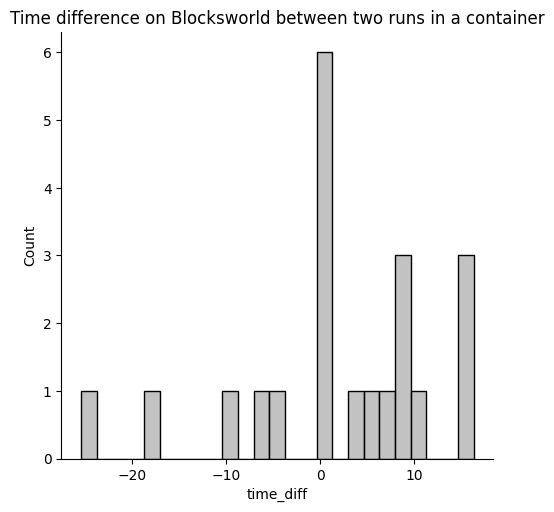

In [8]:
sns.displot(df, x="time_diff", bins=25, color="#aeaeae")
plt.title("Time difference on Blocksworld between two runs in a container");

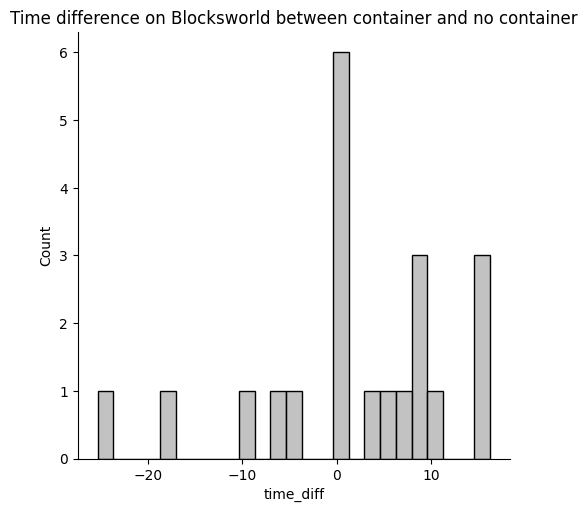

In [9]:
df = df_1.merge(df_2, how="inner", right_index = True, left_index = True, suffixes=('_1', '_2'))
df["time_diff"] = df["cputime_1"] - df["cputime_2"]
# df["time_diff_s"] = df["cputime_s_1"] - df["cputime_s_2"]

sns.displot(df, x="time_diff", bins=25, color="#aeaeae")
plt.title("Time difference on Blocksworld between container and no container");

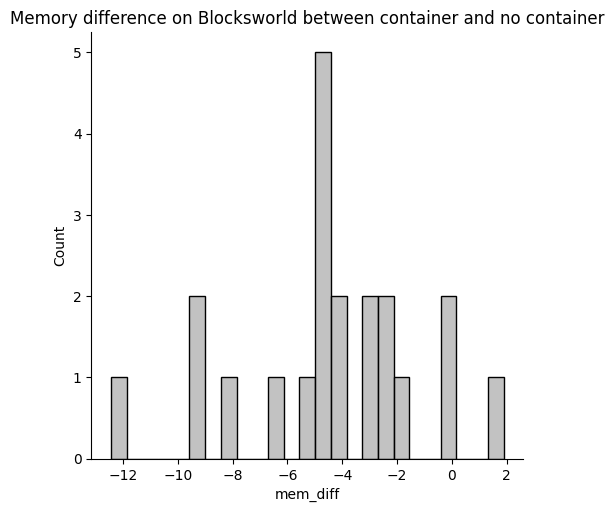

In [10]:
df["mem_diff"] = df["memory_mb_1"] - df["memory_mb_2"]
# df["mem_diff_s"] = df["memory_mb_s_1"] - df["memory_mb_s_2"]

sns.displot(df, x="mem_diff", bins=25, color="#aeaeae")
plt.title("Memory difference on Blocksworld between container and no container");